# Múltiples Subplots

A veces, es útil comparar diferentes vistas de los datos a la vez, es decir, en la misma figura.
Para ello, Matplotlib define el concepto de ``subplots``: grupos de ejes más pequeños que pueden existir juntos dentro de una sola figura.

Estas "subgráficas" pueden ser ``insets``, ``grids`` u otros diseños más complicados.
En esta sección exploraremos cuatro rutinas para crear subplots en Matplotlib.

In [149]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
# plt.style.use('seaborn-whitegrid')
import numpy as np

## ``plt.axes``: Subplots a mano

El método más básico para crear ejes es utilizar la función `` plt.axes ``.
Como hemos visto anteriormente, esto crea de forma predeterminada un objeto de ejes estándar que llena toda la figura.
La función `` plt.axes `` también toma un argumento opcional que es una lista de cuatro números que representan "[izquierda, abajo, ancho, alto]" con la referencia normalizada respecto a la figura.

Por ejemplo, podríamos crear ejes insertados (``inset``) en la esquina superior derecha de otros ejes estableciendo las posiciones X e Y en 0,65 (es decir, comenzando en el 65% del ancho y el 65% de la altura del figura), y los ancho y alto en 0.2 (es decir, el tamaño de los ejes es el 20% del ancho y el 20% de la altura de la figura):

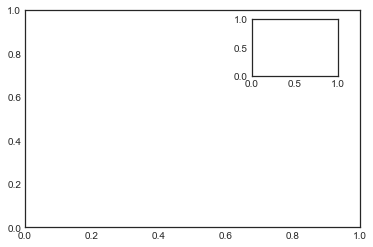

In [29]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

La versión orientada a objetos de esta función es ``fig.add_axes()``. Veamos cómo podemos usar esto para crear una visualización con las 2 gráficas apiladas verticalmente (Es decir, una encima de otra, pegadita):

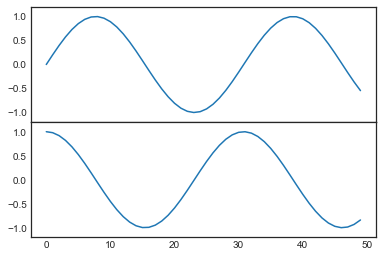

In [30]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

Al tener 2 gráficas, tenemos 4 ejes (2 X y 2 Y). Sin embargo, al haber distribuido asi las gráficas y haberles asignado ese tamaño, el de la parte inferior del panel superior (en la posición 0.5) coincide con la parte superior del panel inferior (en la posición 0.1 + 0.4), y los ejes Y están uno a continuación del otro. Por tanto, deberíamos representar ambas gráficas con el mismo eje X, auqnue tuvieran diferentes magnitudes en el eje Y.

## ``plt.subplot``: Red de visualizaciones


La distribución de visualizaciones dentro de una figura es una necesidad lo suficientemente común como para que Matplotlib tenga varias formas para crearlas fácilmente.

El nivel más bajo de estos métodos es `` plt.subplot() ``, que crea una sola subdivisión dentro de una cuadrícula, definida por los 3 argumentos enteros que recibe: el número de filas, el número de columnas y el índice del gráfico que se creará en este esquema, que va de la parte superior izquierda a la inferior derecha (es decir, de izquierda a derecha, y de arriba a abajo).

Por si hiciera falta, a continuación se muestra un ejemplo de la subdivisión, identificando cada uno de los subplots (solo como curiosidad, fíjate que también existe una función ``plt.text()``, cuya información podrás comprobar en su docstring, aunque lo veremos con detalle en el próximo notebook):

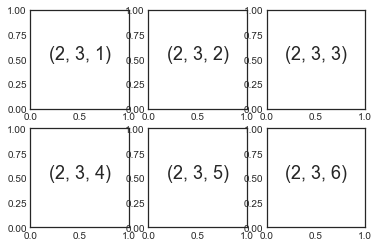

In [32]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

El comando ``plt.subplots_adjust`` puede ser usado para ajustar el espaciado entre las gráficas.
A continuación, se muestra el uso de este comando, así como el de la versión del subplot orientada a objetos, ``fig.add_subplot()``:

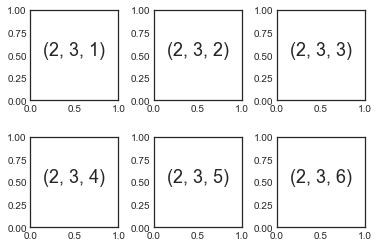

In [33]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

We've used the ``hspace`` and ``wspace`` arguments of ``plt.subplots_adjust``, which specify the **spacing along the height and width of the figure**, in units of the subplot size (in this case, the space is 40% of the subplot width and height).

## ``plt.subplots``: Toda la red de un vistazo

El enfoque que acabamos de ver nos permite una gran flexibilidad, pero puede volverse bastante tedioso al crear una gran red de gráficas, especialmente si queremos ocultar las etiquetas de los ejes X e Y en las gráficas internas.

Para ello, como los que están detrás de Matplotlib piensan en todo, crearon una función que nos facilita todo esto, `` plt.subplots() `` (no la confundas con ``plt.subplot()``, fíjate en la ``s``). En lugar de crear una sola región dentro de la figura, esta función crea una cuadrícula completa de regiones en una sola línea, devolviéndolas en un array de NumPy.

Los argumentos que recibe son el número de filas y de columnas, junto con las palabras clave opcionales `` sharex `` y `` sharey ``, que le permiten especificar las relaciones entre los diferentes ejes.

A continuación, crearemos una red de visualizaciones (vacías) de $ 2 \times 3 $, donde todos los ejes en la misma fila comparten su escala del eje Y, y todos los ejes en la misma columna comparten su escala del eje X:

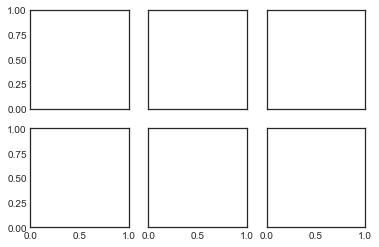

In [37]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

Fíjate que, al especificar `` sharex `` y `` sharey``, hemos eliminado automáticamente las etiquetas internas de cada una de las visualizaciones para que la figura esté más limpia.
La matriz resultante de ejes se devuelve dentro de un array de NumPy, lo que permite un acceso conveniente de los ejes devueltos utilizando la notación de indexación de matrices que estamos acostumbrados a usar:

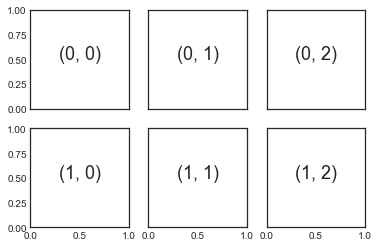

In [36]:
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

Comparando ``plt.subplot()`` con ``plt.subplots()``, vemos que esta última es más consistente en cuanto a la notación de Python para la indexación, que empieza en 0 y no en 1. Fíjate en esto que es fuente de error.

## ``plt.GridSpec``: Complicando aún más las visualizaciones

Y como nos gusta darle la vuelta a las cosas, vamos a estrujar un poco más las redes de visualizaciones, vamos a crearnos redes de visualizaciones con cuadrículas irregulares. Y para ello, nuestra mejor herramienta es `` plt.GridSpec () ``.

El objeto `` plt.GridSpec() `` no crea un gráfico por sí mismo, sino que es simplemente una interfaz diseñada para comunicarse con el comando `` plt.subplot() `` de la mejor manera posible.

Por ejemplo, una *gridspec* para una red de dos filas y tres columnas con unos márgenes internos definidos (en el eje horizontal, con ``wspace``; y en el vertical, con ``hspace``) sería algo así:

In [59]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

Una vez tenemos la *gridspec*, podemos especificar las ubicaciones y extensiones de las subgráficas utilizando la sintaxis de slicing de Python a la que estamos acostumbrados:

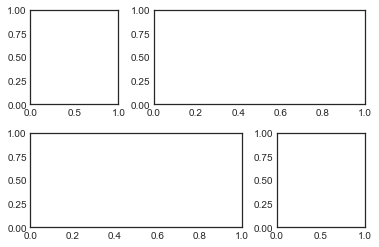

In [61]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

Esta forma de distribuir irregularmente las visualizaciones puede dar lugar a un gran abanico de posibilidades, como, por ejemplo, histogramas multi-índice como el que se muestra a continuación:

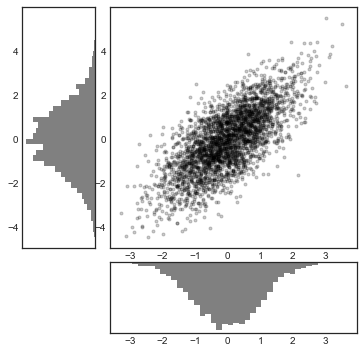

In [93]:
# Creamos datos normalmente distribuidos con cierta correlación
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Establecemos los ejes mediante un gridspec:
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

Este tipo de visualizaciones tendrán su propia API en Seaborn, que lo veremos en el futuro.

## Ejercicio

En este caso, vamos a ir con un ejemplo sencillito:
1. Créate una red de visualizaciones de tamaño 3x3, distribuido del siguiente modo (con la separación que más te guste):
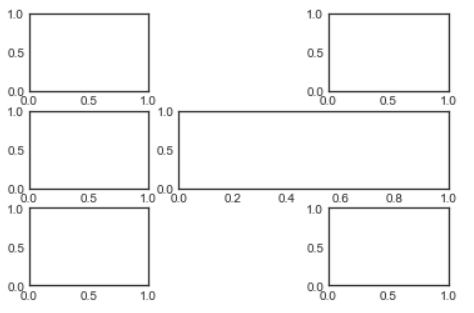

2. Rellena las 3 gráficas de la primera columna (todas las de la izquierda) con las funciones $sin(x)$, $cos(x)$ y $tan(x)$, de arriba a abajo, con un eje X desde -3 a +3, y de colores negro, rojo y azul.
3. Rellena la visualización central con 2 gráficas, de colores azul y naranja, como se muestran en la siguiente figura:
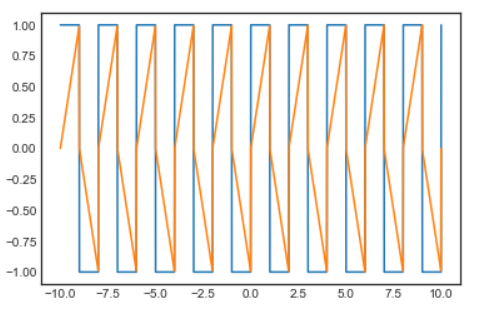


Por si te ayuda, te las pongo por separado, pero lo que tienes que poner en la visualización central son las dos juntitas:
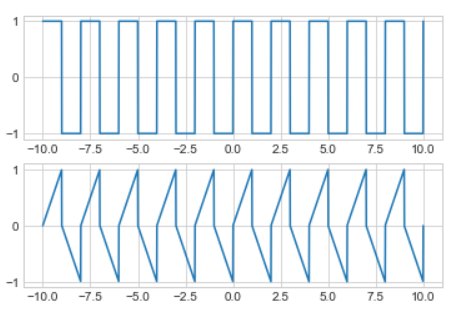

Además, deberás ponerle una leyenda arriba a la derecha, que dientifique la primera línea como "f1", y la segunda como "f2".

4. Finalmente, rellena las gráficas restantes como:
  1. La de arriba deberá tener un texto (que diga lo que quieras y con el tamaño y color que quieras)
  2. La de abajo será un histograma con 10 bins de la columna "Age" del dataset de Titanic


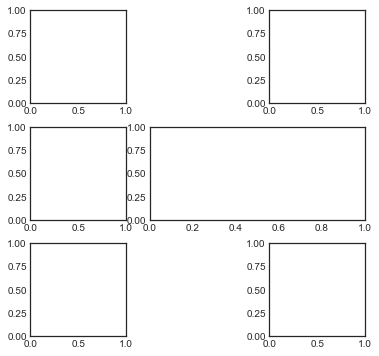

In [206]:
# 1. 
# Establecemos los ejes mediante un gridspec:
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(3, 3, wspace=0.25, hspace=0.25)
axes = [fig.add_subplot(grid[0, 0]), 
        fig.add_subplot(grid[1, 0]), 
        fig.add_subplot(grid[2, 0]), 
        fig.add_subplot(grid[1, 1:3]),
        fig.add_subplot(grid[0, 2]),  
        fig.add_subplot(grid[2, 2])]


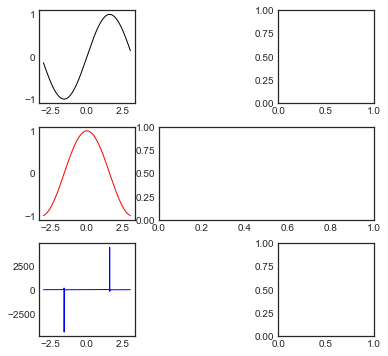

In [207]:
# 2. 
x = np.linspace(-3, 3, 1000)
axes[0].plot(x, np.sin(x), 'k', linewidth=1)
axes[1].plot(x, np.cos(x), 'r', linewidth=1)
axes[2].plot(x, np.tan(x), 'b', linewidth=1)
fig

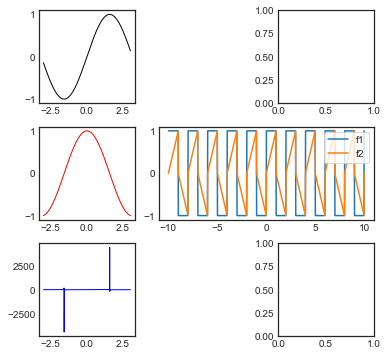

In [208]:
# 3. 
x2 = np.linspace(-10, 10, 2000)
f1 = (-1)**(x2%2 > 1)
f2 = f1*(x2%1)

axes[3].plot(x2, f1, label="f1")
axes[3].plot(x2, f2, label="f2")
axes[3].legend(loc='upper right', frameon=True)
fig

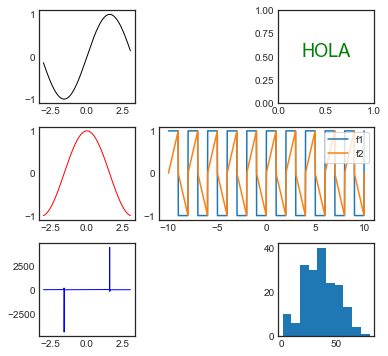

In [209]:
# 4. 
axes[4].text(0.5, 0.5, "HOLA", fontsize=18, ha='center', color='g')

import pandas as pd
df = pd.read_csv("titanic.csv").dropna()

axes[5].hist(df['Age'], bins=10)
fig